# Part II: Time series analysis with recurrent neural nets

The remaining parts of the project will build models for time series data using tensorflow.

We will be using the mortgage affordability provided by Zillow https://www.zillow.com/research/data/

The project repository includes the data and utility functions to load and plot it

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import proj3_lib.utils as utils

df = utils.load_df()
df.head(10)

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2014-12,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03
0,102001,United States,0,Price To Income,2.761208,2.900720,2.937383,2.942143,2.939925,2.927195,...,3.152226,3.155972,3.181463,3.204568,3.217370,3.237576,3.275063,3.313864,3.360883,3.393598
1,394913,"New York, NY",1,Price To Income,3.990319,2.997267,3.027436,3.038259,3.029421,3.074699,...,5.369690,5.396107,5.410768,5.438490,5.472523,5.473098,5.507796,5.595654,5.652829,5.735651
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Price To Income,4.527275,4.096690,4.222295,4.292069,4.356966,4.383297,...,8.503298,8.583068,8.667236,8.749237,8.816258,8.905885,8.985033,9.019754,9.166646,9.233568
3,394463,"Chicago, IL",3,Price To Income,2.996893,2.999878,3.010842,2.951182,2.937148,2.858200,...,2.994046,3.008058,3.041787,3.050560,3.042783,3.045613,3.074701,3.097283,3.131809,3.175027
4,394514,"Dallas-Fort Worth, TX",4,Price To Income,2.743388,3.448869,3.572811,3.641414,3.663713,3.665388,...,2.622328,2.640080,2.732534,2.833971,2.927307,2.980528,3.063613,3.150577,3.192222,3.246032
5,394974,"Philadelphia, PA",5,Price To Income,2.631571,2.340232,2.339866,2.342242,2.348988,2.391119,...,3.149444,3.121058,3.123951,3.131546,3.115241,3.113039,3.118342,3.148780,3.168467,3.164481
6,394692,"Houston, TX",6,Price To Income,2.034829,2.785127,2.889447,2.863596,2.791802,2.774594,...,2.488866,2.547114,2.586445,2.634714,2.682914,2.738604,2.776108,2.813314,2.813419,2.780047
7,395209,"Washington, DC",7,Price To Income,3.004250,2.911961,2.881169,2.962990,2.985181,3.019574,...,3.879706,3.890245,3.913065,3.914454,3.915389,3.905645,3.908645,3.916844,3.957217,3.967122
8,394856,"Miami-Fort Lauderdale, FL",8,Price To Income,2.679810,3.067725,3.091763,3.066614,3.148900,3.176355,...,4.033833,4.119198,4.245038,4.368804,4.460129,4.483169,4.560087,4.651173,4.710330,4.732619
9,394347,"Atlanta, GA",9,Price To Income,2.578525,2.843810,2.877996,2.903043,2.963526,3.011098,...,2.514982,2.540250,2.568907,2.610630,2.647483,2.671367,2.694920,2.726181,2.771375,2.792185


In [3]:
import proj3_lib.utils as utils

afford_df = utils.get_affordability_df()
afford_df.head(10)

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2014-12,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03
324,394913,"New York, NY",1,0.261700,0.278316,0.284399,0.319438,0.379845,0.318970,0.337586,...,0.241961,0.240494,0.247387,0.245957,0.249606,0.241544,0.239503,0.240021,0.265376,0.269264
325,753899,"Los Angeles-Long Beach-Anaheim, CA",2,0.357694,0.388161,0.401762,0.459422,0.541508,0.464528,0.486750,...,0.383162,0.382531,0.396277,0.395686,0.402116,0.393042,0.390708,0.386895,0.430334,0.433476
326,394463,"Chicago, IL",3,0.261928,0.276790,0.276248,0.309709,0.353099,0.299344,0.295616,...,0.134913,0.134063,0.139074,0.137962,0.138784,0.134412,0.133701,0.132856,0.147025,0.149054
327,394514,"Dallas-Fort Worth, TX",4,0.301131,0.328453,0.340857,0.386321,0.452818,0.376912,0.394715,...,0.118163,0.117663,0.124935,0.128167,0.133517,0.131539,0.133219,0.135142,0.149861,0.152387
328,394974,"Philadelphia, PA",5,0.204333,0.215107,0.219247,0.247690,0.295396,0.248018,0.260259,...,0.141915,0.139100,0.142831,0.141625,0.142089,0.137387,0.135599,0.135064,0.148746,0.148559
329,394692,"Houston, TX",6,0.243178,0.265630,0.268049,0.294382,0.342770,0.291661,0.292763,...,0.112149,0.113520,0.118255,0.119155,0.122370,0.120863,0.120717,0.120675,0.132078,0.130511
330,395209,"Washington, DC",7,0.254252,0.264869,0.277353,0.314773,0.373035,0.319475,0.337635,...,0.174821,0.173381,0.178910,0.177032,0.178584,0.172367,0.169965,0.168010,0.185774,0.186239
331,394856,"Miami-Fort Lauderdale, FL",8,0.267852,0.284229,0.287053,0.332037,0.392403,0.334098,0.360938,...,0.181766,0.183585,0.194088,0.197580,0.203430,0.197855,0.198292,0.199508,0.221129,0.222176
332,394347,"Atlanta, GA",9,0.248301,0.264578,0.271742,0.312490,0.371988,0.307385,0.322451,...,0.113326,0.113214,0.117454,0.118066,0.120754,0.117895,0.117187,0.116937,0.130104,0.131081
333,394404,"Boston, MA",10,0.222021,0.237248,0.239940,0.276893,0.316496,0.271210,0.285134,...,0.212892,0.210786,0.216809,0.217371,0.221722,0.215844,0.214103,0.212644,0.236357,0.239656


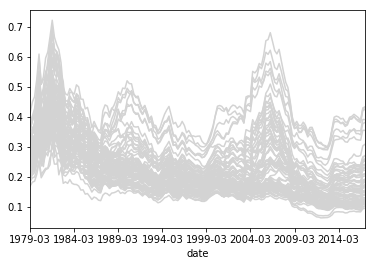

In [4]:
%matplotlib inline

utils.plot_affordability_series(afford_df)

## Getting data ready

We will build models that forecast mortgage affordability based on the previous year's affordability values. First, we will split the data into a training and testing set. We take data from 2015-2017 as the test set, and all previous data as the training set.

In [5]:
train_df, test_df = utils.split_train_test(afford_df)
train_df.head(10)

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2012-09,2012-12,2013-03,2013-06,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12
324,394913,"New York, NY",1,0.261700,0.278316,0.284399,0.319438,0.379845,0.318970,0.337586,...,0.224406,0.217553,0.224845,0.241536,0.260265,0.261124,0.258286,0.253598,0.252561,0.241961
325,753899,"Los Angeles-Long Beach-Anaheim, CA",2,0.357694,0.388161,0.401762,0.459422,0.541508,0.464528,0.486750,...,0.304163,0.300080,0.320920,0.359241,0.399297,0.402892,0.400288,0.393393,0.395619,0.383162
326,394463,"Chicago, IL",3,0.261928,0.276790,0.276248,0.309709,0.353099,0.299344,0.295616,...,0.121624,0.117433,0.121061,0.131412,0.141545,0.142888,0.141657,0.138968,0.140140,0.134913
327,394514,"Dallas-Fort Worth, TX",4,0.301131,0.328453,0.340857,0.386321,0.452818,0.376912,0.394715,...,0.104923,0.101957,0.105754,0.114501,0.123787,0.125153,0.123385,0.121437,0.121808,0.118163
328,394974,"Philadelphia, PA",5,0.204333,0.215107,0.219247,0.247690,0.295396,0.248018,0.260259,...,0.138880,0.134923,0.139083,0.148469,0.156956,0.155812,0.153202,0.149514,0.148801,0.141915
329,394692,"Houston, TX",6,0.243178,0.265630,0.268049,0.294382,0.342770,0.291661,0.292763,...,0.098418,0.095124,0.100012,0.108338,0.116628,0.117413,0.117756,0.115155,0.115139,0.112149
330,395209,"Washington, DC",7,0.254252,0.264869,0.277353,0.314773,0.373035,0.319475,0.337635,...,0.154836,0.151755,0.158257,0.172656,0.187634,0.188332,0.186160,0.182190,0.181112,0.174821
331,394856,"Miami-Fort Lauderdale, FL",8,0.267852,0.284229,0.287053,0.332037,0.392403,0.334098,0.360938,...,0.138716,0.137069,0.144781,0.158816,0.173367,0.178324,0.179022,0.178909,0.183493,0.181766
332,394347,"Atlanta, GA",9,0.248301,0.264578,0.271742,0.312490,0.371988,0.307385,0.322451,...,0.095713,0.094102,0.098104,0.106779,0.117112,0.119381,0.118612,0.117381,0.117480,0.113326
333,394404,"Boston, MA",10,0.222021,0.237248,0.239940,0.276893,0.316496,0.271210,0.285134,...,0.190975,0.186108,0.194533,0.209238,0.224103,0.225616,0.224394,0.221862,0.221977,0.212892


To build our models, we will cast our forecasting task as a supervised learning problem by using one year's worth of affordability values as predictors, and the next value in the series as the target. 

The function `utils.get_X_y` creates an X and y matrix that arranges the data in this way

In [6]:
train_X, train_y = utils.get_X_y(train_df)

In [7]:
print(train_X.shape)
print(train_y.shape)
train_X[:10,:]


(10425, 4)
(10425,)


array([[ 0.26170029,  0.27831582,  0.28439863,  0.3194383 ],
       [ 0.27831582,  0.28439863,  0.3194383 ,  0.37984483],
       [ 0.28439863,  0.3194383 ,  0.37984483,  0.31897013],
       [ 0.3194383 ,  0.37984483,  0.31897013,  0.33758634],
       [ 0.37984483,  0.31897013,  0.33758634,  0.3662265 ],
       [ 0.31897013,  0.33758634,  0.3662265 ,  0.38535562],
       [ 0.33758634,  0.3662265 ,  0.38535562,  0.42299692],
       [ 0.3662265 ,  0.38535562,  0.42299692,  0.46877107],
       [ 0.38535562,  0.42299692,  0.46877107,  0.4219737 ],
       [ 0.42299692,  0.46877107,  0.4219737 ,  0.41349565]])

In [8]:
train_y[:10]

array([ 0.37984483,  0.31897013,  0.33758634,  0.3662265 ,  0.38535562,
        0.42299692,  0.46877107,  0.4219737 ,  0.41349565,  0.41568123])

In [9]:
test_X, test_y = utils.get_X_y(test_df)
print(test_X.shape)
print(test_y.shape)

(300, 4)
(300,)


## Baseline model

To get a sense of the problem, let's use a baseline model that uses average mortgage affordability over the previous year to forecast each value in the test set.

In [10]:
import numpy as np

yhat = np.mean(test_X, axis=1)

Now let's see what the mean _absolute_ error for this baseline model is

In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, yhat)
print("Baseline MAE: {:.5f}".format(mae))

Baseline MAE: 0.00635


## Task 1: Linear Regression Model

Train a linear regression model using TensorFlow for this task.

- Recall that for linear regression we want to build a model

$$
f = Xw + b
$$ 

where in this case, $X$ will be a matrix with 4 columns, corresponding to the values of affordability for the previous year.

- Use mean absolute error (MAE) as the loss function

- Use the version of gradient descent provided by AdamOptimizer https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer

- Don't worry about tuning parameters yet (i.e., the number of units in the hidden layer units). Choose a number and go with it.

- Report the mean absolute error of this model on the test set


In [13]:
# File proj3_lib.linreg.py includes an implementation of linear regression using
# 'dense' layers from tensor flow, and based on the Estimator interface provided
# by the tf.contrib.learn pacakge. You can study that file, and see how that is used here
# to get an idea of how to proceed with the next two tasks

import proj3_lib.linreg as linreg

linreg_estimator = linreg.get_estimator()

# this runs the optimizer for one 1000 steps, using 10 observations in each step
linreg_estimator.fit(train_X, train_y, batch_size=10, steps=1000)

# now, evaluate loss on the test set
linreg_estimator.score(test_X, test_y)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4B046B70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmpbsfu7yar\model.ckpt.
INFO:tensorflow:loss = 0.661250664665, step = 1
INFO:tensorflow:global_step/sec: 1538.45
INFO:tensorflow:loss = 0.0323866945414, step = 101 (0.066 sec)
INFO:tensorflow:global_step/sec: 1613.26
INFO:tensorflow:loss = 0.0211678880022, step = 

{'global_step': 1000, 'loss': 0.0083840312}

## Task 2: Single Layer Feed-Forward Neural Network

Train a single layer feed forward neural network using TensorFlow

- Again, use MAE as the loss function, and AdamOptimizer to train the model

- Report the mean absolute error of this model on the test set

## Here I use single layer feed-forward neural network. We just add one hidden layer. So totally we need to define two layers, h1 and out.

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.learn import SKCompat, Estimator    

def get_estimator(learning_rate=0.01, n_hidden1=10):
    return SKCompat(Estimator(model_fn=_model_fn, params={'learning_rate': learning_rate, 'n_hidden1': n_hidden1}))

def _model_fn(features, labels, mode, params):
    # one hiddern layers
    # and an output layer
    h1 = tf.layers.dense(features, params['n_hidden1'], activation=tf.nn.relu)
    out = tf.layers.dense(h1, 1, activation=None)        
    
    # reshape predictions
    predictions = tf.reshape(out, [-1])
    predictions_dict = {'afford': predictions}
    
    # 
    loss = tf.reduce_mean(tf.cast(tf.abs(labels - predictions),tf.float32))

    train_op = tf.contrib.layers.optimize_loss(
            loss = loss,
            global_step = tf.contrib.framework.get_global_step(),
            learning_rate = params['learning_rate'],
            optimizer = tf.train.AdamOptimizer)
    
    return predictions, loss, train_op


slff_estimator = get_estimator()

# this runs the optimizer for one 1000 steps, using 10 observations in each step
slff_estimator.fit(train_X, train_y, batch_size=10, steps=1000)

# now, evaluate loss on the test set
slff_estimator.score(test_X, test_y)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4B2F4128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmpdhtya4s9\model.ckpt.
INFO:tensorflow:loss = 0.219233, step = 1
INFO:tensorflow:global_step/sec: 1389.28
INFO:tensorflow:loss = 0.00749218, step = 101 (0.073 sec)
INFO:tensorflow:global_step/sec: 1538.4
INFO:tensorflow:loss = 0.0248255, step = 201 (0.066 sec)
IN

{'global_step': 1000, 'loss': 0.0066236309}

## Task 3: Deep Neural Network

Train a neural network with one or more layers for this task. 

- Again, using MAE as the loss function, and the AdamOptimizer to train the model. 

- Here, try tuning parameters (the number of hidden layers, and the number of units per layer). Use a validation set (you can use functions `split_train_test` and `get_X_y` to create your validation set.

- Report the mean absolute error of this model on the test set

## Here I use deep neural network. In this DNN the number of hidden layers can vary from 2 to 4. Then I use several inputs on number of units per layer and then at the end I report the best results. All the results are written in a csv output file and then I read the output file and show it here.

In [48]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.learn import SKCompat, Estimator    


OUTPUT = "Output.csv"
outfile = open(OUTPUT,"w")


def get_estimator(learning_rate=0.01, n_hidden1=4, n_hidden2=4, n_hidden3=4, n_hidden4=4, n_hid_layers=2):
    return SKCompat(Estimator(model_fn=_model_fn, params={'n_hid_layers':n_hid_layers,'learning_rate': learning_rate, 'n_hidden1': n_hidden1, 'n_hidden2': n_hidden2,'n_hidden3': n_hidden3,'n_hidden4': n_hidden4}))

def _model_fn(features, labels, mode, params):
    
    # total of 4 hiddern layers
    
    h1 = tf.layers.dense(features, params['n_hidden1'], activation=tf.nn.relu)
    h2 = tf.layers.dense(h1, params['n_hidden2'], activation=tf.nn.relu)
    h3 = tf.layers.dense(h2, params['n_hidden3'], activation=tf.nn.relu)
    h4 = tf.layers.dense(h3, params['n_hidden4'], activation=tf.nn.relu)
    
    # an output layer based on number of hidden layers
    
    if n_hid_layers==2:
        input_of_output=h2
    elif n_hid_layers==3:
        input_of_output=h3
    elif n_hid_layers==4:
        input_of_output=h4
        
    out = tf.layers.dense(input_of_output, 1, activation=None)        
    
    # reshape predictions
    predictions = tf.reshape(out, [-1])
    predictions_dict = {'afford': predictions}
    
    # 
    loss = tf.reduce_mean(tf.cast(tf.abs(labels - predictions),tf.float32))

    train_op = tf.contrib.layers.optimize_loss(
            loss = loss,
            global_step = tf.contrib.framework.get_global_step(),
            learning_rate = params['learning_rate'],
            optimizer = tf.train.AdamOptimizer)
    
    return predictions, loss, train_op

def fit_score(learning_rate=0.01, n_hidden1=4, n_hidden2=4, n_hidden3=4, n_hidden4=4, n_hid_layers=2):
    DNN_estimator = get_estimator(learning_rate=learning_rate, n_hidden1=n_hidden1, n_hidden2=n_hidden2, n_hidden3=n_hidden3, n_hidden4=n_hidden4, n_hid_layers=n_hid_layers)

    # this runs the optimizer for one 1000 steps, using 10 observations in each step
    DNN_estimator.fit(train_X, train_y, batch_size=10, steps=1000)

    # now, evaluate loss on the test set
    score=DNN_estimator.score(test_X, test_y)
    
    #print("n_hid_layers:", n_hid_layers)
    #print("n_hidden1:",n_hidden1)
    #print("n_hidden2:",n_hidden2)
    #if n_hid_layers>=3:
     #   print("n_hidden3:",n_hidden3)
    #if n_hid_layers==4:    
    #    print("n_hidden4:",n_hidden4)
    #print("score:",score)
    
    
    outfile.write("n_hid_layers:"+ str(n_hid_layers) + "\n")
    outfile.write("n_hidden1:"+ str( n_hidden1) + "\n")
    outfile.write("n_hidden2:"+ str(n_hidden2 )+ "\n")
    if n_hid_layers>=3  :
        outfile.write("n_hidden3:"+ str(n_hidden3) + "\n")
    if n_hid_layers==4:    
        outfile.write("n_hidden4:"+ str(n_hidden4) + "\n")
    outfile.write("score:"+ str(score) + "\n\n")    
    
    
    return (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score['loss'])
    
best_n_hid_layers=0
best_n_hidden1=0
best_n_hidden2=0
best_n_hidden3=0
best_n_hidden4=0
best_score=100000


for n_hid_layers in {2}:
    for n_hidden1 in {4,10,30}:
        for n_hidden2 in {4,10}:
            
            (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score)=fit_score( n_hid_layers=n_hid_layers, n_hidden1=n_hidden1, n_hidden2=n_hidden2,n_hidden3=n_hidden3, n_hidden4=n_hidden4)  

            if (score <= best_score):
                best_n_hid_layers=n_hid_layers
                best_n_hidden1=n_hidden1
                best_n_hidden2=n_hidden2
                best_n_hidden3=n_hidden3
                best_n_hidden4=n_hidden4
                best_score=score   
                        
                        
                        
for n_hid_layers in {3}:
    for n_hidden1 in {4,10,30}:
        for n_hidden2 in {4,10}:
            for n_hidden3 in {4,10}:


                (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score)=fit_score( n_hid_layers=n_hid_layers, n_hidden1=n_hidden1, n_hidden2=n_hidden2,n_hidden3=n_hidden3, n_hidden4=n_hidden4)  

                if (score <= best_score):
                    best_n_hid_layers=n_hid_layers
                    best_n_hidden1=n_hidden1
                    best_n_hidden2=n_hidden2
                    best_n_hidden3=n_hidden3
                    best_n_hidden4=n_hidden4
                    best_score=score                           
                        
for n_hid_layers in {4}:
    for n_hidden1 in {4,10,30}:
        for n_hidden2 in {4,10}:
            for n_hidden3 in {4,10}:
                for n_hidden4 in {4,10}:

                    (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score)=fit_score( n_hid_layers=n_hid_layers, n_hidden1=n_hidden1, n_hidden2=n_hidden2,n_hidden3=n_hidden3, n_hidden4=n_hidden4)  

                    if (score <= best_score):
                        best_n_hid_layers=n_hid_layers
                        best_n_hidden1=n_hidden1
                        best_n_hidden2=n_hidden2
                        best_n_hidden3=n_hidden3
                        best_n_hidden4=n_hidden4
                        best_score=score                        
                    

outfile.write("best_n_hid_layers:"+ str(best_n_hid_layers) + "\n")
outfile.write("best_n_hidden1:"+ str( best_n_hidden1) + "\n")
outfile.write("best_n_hidden2:"+ str(best_n_hidden2 )+ "\n")
if best_n_hid_layers>=3  :
    outfile.write("best_n_hidden3:"+ str(best_n_hidden3) + "\n")
if best_n_hid_layers==4:    
    outfile.write("best_n_hidden4:"+ str(best_n_hidden4) + "\n")
outfile.write("best_score:"+ str(best_score) + "\n\n")   

outfile.close()

print("best_n_hid_layers:"+ str(best_n_hid_layers) + "\n")
print("best_n_hidden1:"+ str( best_n_hidden1) + "\n")
print("best_n_hidden2:"+ str(best_n_hidden2 )+ "\n")
if best_n_hid_layers>=3  :
    print("best_n_hidden3:"+ str(best_n_hidden3) + "\n")
if best_n_hid_layers==4:    
    print("best_n_hidden4:"+ str(best_n_hidden4) + "\n")
print("best_score:"+ str(best_score) + "\n\n")   

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4D883588>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmpioi463tq\model.ckpt.
INFO:tensorflow:loss = 0.238355, step = 1
INFO:tensorflow:global_step/sec: 1333.35
INFO:tensorflow:loss = 0.0141394, step = 101 (0.076 sec)
INFO:tensorflow:global_step/sec: 1562.47
INFO:tensorflow:loss = 0.0307215, step = 201 (0.065 sec)
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmpfibo_54e\model.ckpt.
INFO:tensorflow:loss = 0.339408, step = 1
INFO:tensorflow:global_step/sec: 1389
INFO:tensorflow:loss = 0.0469727, step = 101 (0.073 sec)
INFO:tensorflow:global_step/sec: 1492.33
INFO:tensorflow:loss = 0.110691, step = 201 (0.067 sec)
INFO:tensorflow:global_step/sec: 1562.97
INFO:tensorflow:loss = 0.0608904, step = 301 (0.064 sec)
INFO:tensorflow:global_step/sec: 1612.93
INFO:tensorflow:loss = 0.0636964, step = 401 (0.062 sec)
INFO:tensorflow:global_step/sec: 1724.13
INFO:tensorflow:loss = 0.0758376, step = 501 (0.058 sec)
INFO:tensorflow:global_step/sec: 1639.35
INFO:tensorflow:loss = 0.0874395, step = 601 (0.061 sec)
INFO:tensorflow:global_step/sec: 1666.63
INFO:tensorflow:loss = 0.0509398, step = 701 (0.060 sec)
INFO:tensorflow:global_step/sec: 1612.93
INFO:tensorflow:loss = 0.102959, step = 801 (0.062 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmp1aoe36q4\model.ckpt.
INFO:tensorflow:loss = 0.269483, step = 1
INFO:tensorflow:global_step/sec: 1315.82
INFO:tensorflow:loss = 0.0099605, step = 101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1265.77
INFO:tensorflow:loss = 0.023086, step = 201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1470.66
INFO:tensorflow:loss = 0.014452, step = 301 (0.068 sec)
INFO:tensorflow:global_step/sec: 1408.47
INFO:tensorflow:loss = 0.00958133, step = 401 (0.071 sec)
INFO:tensorflow:global_step/sec: 1204.69
INFO:tensorflow:loss = 0.0163028, step = 501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1428.74
INFO:tensorflow:loss = 0.0356816, step = 601 (0.069 sec)
INFO:tensorflow:global_step/sec: 1204.78
INFO:tensorflow:loss = 0.0101475, step = 701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1492.58
INFO:tensorflow:loss = 0.0259571, step = 801 (0.067 sec)
INFO:tensorflow:global_step

INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmp1j43u5gf\model.ckpt.
INFO:tensorflow:loss = 0.192794, step = 1
INFO:tensorflow:global_step/sec: 1282.32
INFO:tensorflow:loss = 0.0090055, step = 101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1428.26
INFO:tensorflow:loss = 0.0248954, step = 201 (0.069 sec)
INFO:tensorflow:global_step/sec: 1538.8
INFO:tensorflow:loss = 0.0102864, step = 301 (0.066 sec)
INFO:tensorflow:global_step/sec: 1470.58
INFO:tensorflow:loss = 0.00680821, step = 401 (0.067 sec)
INFO:tensorflow:global_step/sec: 1538.05
INFO:tensorflow:loss = 0.0232708, step = 501 (0.066 sec)
INFO:tensorflow:global_step/sec: 1514.99
INFO:tensorflow:loss = 0.0315559, step = 601 (0.066 sec)
INFO:tensorflow:global_step/sec: 1538.96
INFO:tensorflow:loss = 0.0117725, step = 701 (0.065 sec)
INFO:tensorflow:global_step/sec: 1515.05
INFO:tensorflow:loss = 0.0108647, step = 801 (0.066 sec)
INFO:tensorflow:global_step/sec: 1514.88
INFO:tensorflow:loss = 0.0142

INFO:tensorflow:global_step/sec: 1333.33
INFO:tensorflow:loss = 0.0469727, step = 101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1754.43
INFO:tensorflow:loss = 0.110969, step = 201 (0.056 sec)
INFO:tensorflow:global_step/sec: 1754.39
INFO:tensorflow:loss = 0.061615, step = 301 (0.057 sec)
INFO:tensorflow:global_step/sec: 1694.9
INFO:tensorflow:loss = 0.0631248, step = 401 (0.059 sec)
INFO:tensorflow:global_step/sec: 1785.71
INFO:tensorflow:loss = 0.0758376, step = 501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1562.52
INFO:tensorflow:loss = 0.0888345, step = 601 (0.057 sec)
INFO:tensorflow:global_step/sec: 1754.4
INFO:tensorflow:loss = 0.0515055, step = 701 (0.057 sec)
INFO:tensorflow:global_step/sec: 1724.14
INFO:tensorflow:loss = 0.102959, step = 801 (0.058 sec)
INFO:tensorflow:global_step/sec: 1724.11
INFO:tensorflow:loss = 0.0886377, step = 901 (0.058 sec)
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Elham\AppData\Local\Temp\tmp1vu00yps\model.ckpt.
INFO:tensorflow:

INFO:tensorflow:loss = 0.0241938, step = 201 (0.065 sec)
INFO:tensorflow:global_step/sec: 1562.5
INFO:tensorflow:loss = 0.0214466, step = 301 (0.063 sec)
INFO:tensorflow:global_step/sec: 1612.91
INFO:tensorflow:loss = 0.00752524, step = 401 (0.063 sec)
INFO:tensorflow:global_step/sec: 1587.28
INFO:tensorflow:loss = 0.0148424, step = 501 (0.062 sec)
INFO:tensorflow:global_step/sec: 1562.5
INFO:tensorflow:loss = 0.0337907, step = 601 (0.064 sec)
INFO:tensorflow:global_step/sec: 1612.92
INFO:tensorflow:loss = 0.0125753, step = 701 (0.062 sec)
INFO:tensorflow:global_step/sec: 1562.52
INFO:tensorflow:loss = 0.0225406, step = 801 (0.065 sec)
INFO:tensorflow:global_step/sec: 1562.47
INFO:tensorflow:loss = 0.0151897, step = 901 (0.063 sec)
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Elham\AppData\Local\Temp\tmp4982355g\model.ckpt.
INFO:tensorflow:Loss for final step: 0.015808.
INFO:tensorflow:Starting evaluation at 2017-11-27-18:20:52
INFO:tensorflow:Restoring parameters from C:\

INFO:tensorflow:global_step/sec: 1612.9
INFO:tensorflow:loss = 0.00952133, step = 401 (0.062 sec)
INFO:tensorflow:global_step/sec: 1562.5
INFO:tensorflow:loss = 0.0205096, step = 501 (0.065 sec)
INFO:tensorflow:global_step/sec: 1562.45
INFO:tensorflow:loss = 0.0292936, step = 601 (0.064 sec)
INFO:tensorflow:global_step/sec: 1562.55
INFO:tensorflow:loss = 0.012274, step = 701 (0.063 sec)
INFO:tensorflow:global_step/sec: 1587.28
INFO:tensorflow:loss = 0.0192232, step = 801 (0.064 sec)
INFO:tensorflow:global_step/sec: 1587.27
INFO:tensorflow:loss = 0.0155002, step = 901 (0.062 sec)
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Elham\AppData\Local\Temp\tmpwan0sq4y\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0131967.
INFO:tensorflow:Starting evaluation at 2017-11-27-18:21:10
INFO:tensorflow:Restoring parameters from C:\Users\Elham\AppData\Local\Temp\tmpwan0sq4y\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-27-18:21:11
INFO:tensorflow:Saving dict for globa

INFO:tensorflow:loss = 0.0146718, step = 501 (0.062 sec)
INFO:tensorflow:global_step/sec: 1639.35
INFO:tensorflow:loss = 0.0299418, step = 601 (0.061 sec)
INFO:tensorflow:global_step/sec: 1639.33
INFO:tensorflow:loss = 0.00946664, step = 701 (0.061 sec)
INFO:tensorflow:global_step/sec: 1694.92
INFO:tensorflow:loss = 0.0207882, step = 801 (0.060 sec)
INFO:tensorflow:global_step/sec: 1612.89
INFO:tensorflow:loss = 0.0155421, step = 901 (0.061 sec)
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Elham\AppData\Local\Temp\tmps8qw3t61\model.ckpt.
INFO:tensorflow:Loss for final step: 0.015607.
INFO:tensorflow:Starting evaluation at 2017-11-27-18:21:30
INFO:tensorflow:Restoring parameters from C:\Users\Elham\AppData\Local\Temp\tmps8qw3t61\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-27-18:21:30
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.00980581
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': Non

INFO:tensorflow:global_step/sec: 1562.5
INFO:tensorflow:loss = 0.00968765, step = 701 (0.064 sec)
INFO:tensorflow:global_step/sec: 1587.28
INFO:tensorflow:loss = 0.0200234, step = 801 (0.064 sec)
INFO:tensorflow:global_step/sec: 1587.33
INFO:tensorflow:loss = 0.0219078, step = 901 (0.063 sec)
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Elham\AppData\Local\Temp\tmp5tlrxx6p\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0151896.
INFO:tensorflow:Starting evaluation at 2017-11-27-18:21:48
INFO:tensorflow:Restoring parameters from C:\Users\Elham\AppData\Local\Temp\tmp5tlrxx6p\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-27-18:21:49
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.0104328
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4DB4ECC0>, '_master': '', '_num_ps_replicas': 0, '

INFO:tensorflow:loss = 0.0220859, step = 801 (0.064 sec)
INFO:tensorflow:global_step/sec: 1587.3
INFO:tensorflow:loss = 0.0164949, step = 901 (0.063 sec)
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Elham\AppData\Local\Temp\tmp1w9hwehy\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0136858.
INFO:tensorflow:Starting evaluation at 2017-11-27-18:22:07
INFO:tensorflow:Restoring parameters from C:\Users\Elham\AppData\Local\Temp\tmp1w9hwehy\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-27-18:22:08
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.00846913
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4D336E10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_g

INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Elham\AppData\Local\Temp\tmprp0a2p84\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0124769.
INFO:tensorflow:Starting evaluation at 2017-11-27-18:22:27
INFO:tensorflow:Restoring parameters from C:\Users\Elham\AppData\Local\Temp\tmprp0a2p84\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-27-18:22:27
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.00969336
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4BFE4908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_chec

INFO:tensorflow:Starting evaluation at 2017-11-27-18:22:46
INFO:tensorflow:Restoring parameters from C:\Users\Elham\AppData\Local\Temp\tmpynuekvxi\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-27-18:22:46
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.0753395
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4C0CF908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints 

INFO:tensorflow:Starting evaluation at 2017-11-27-18:23:05
INFO:tensorflow:Restoring parameters from C:\Users\Elham\AppData\Local\Temp\tmpu2sba3zh\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-27-18:23:06
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.00993408
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4D647C50>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints

INFO:tensorflow:Finished evaluation at 2017-11-27-18:23:25
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.00864757
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022D4CB676A0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmp8y0vo6ft\model.ckpt.
INFO:tensorflow:loss = 0.247634, step = 1
INFO:tensorflow:global_step/sec: 1204.82
INFO:tenso

In [49]:
import csv
with open('Output.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        print(row)

['n_hid_layers:2']
['n_hidden1:10']
['n_hidden2:10']
["score:{'loss': 0.0087111192", " 'global_step': 1000}"]
[]
['n_hid_layers:2']
['n_hidden1:10']
['n_hidden2:4']
["score:{'loss': 0.076995842", " 'global_step': 1000}"]
[]
['n_hid_layers:2']
['n_hidden1:4']
['n_hidden2:10']
["score:{'loss': 0.0085328305", " 'global_step': 1000}"]
[]
['n_hid_layers:2']
['n_hidden1:4']
['n_hidden2:4']
["score:{'loss': 0.076995842", " 'global_step': 1000}"]
[]
['n_hid_layers:2']
['n_hidden1:30']
['n_hidden2:10']
["score:{'loss': 0.0082495883", " 'global_step': 1000}"]
[]
['n_hid_layers:2']
['n_hidden1:30']
['n_hidden2:4']
["score:{'loss': 0.010308321", " 'global_step': 1000}"]
[]
['n_hid_layers:3']
['n_hidden1:10']
['n_hidden2:10']
['n_hidden3:10']
["score:{'loss': 0.0086725662", " 'global_step': 1000}"]
[]
['n_hid_layers:3']
['n_hidden1:10']
['n_hidden2:10']
['n_hidden3:4']
["score:{'loss': 0.0090575414", " 'global_step': 1000}"]
[]
['n_hid_layers:3']
['n_hidden1:10']
['n_hidden2:4']
['n_hidden3:10']
["

## Next time

In the next section we will use recurrent neural networks for this task